# Random Forest on FPI Data

### Importing Necessary Data

In [1]:
import sys
from pathlib import Path

# Define the root path
root_path = '/Users/elliotdable/Documents/UCL/research/fpi_ml/'  # Adjust as needed
sys.path.append(str(root_path))

from src.madrigal import madrigal_fpi_reader, run_msis_specific_location, prep_ml_dataset

%load_ext autoreload
%autoreload 2

In [2]:
dir = "/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data"
zonal_winds, meridional_winds, temps = madrigal_fpi_reader(dir)

/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data/millstone_hill
5792 files found.
/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data/caocheira_paulista
3351 files found.
/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data/arecibo
2279 files found.
/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data/ccore
1121 files found.


In [3]:
temps = temps[(temps.temperature < 1700) & (temps.temperature > 700)]

In [4]:
params = ['year', 'month', 'day', 'hour',
        'geodetic_latitude', 'geodetic_longitude', 'solar_zenith_angle', 'kp',
        'dst', 'f10.7', 'multiday_f10.7', 'ap_3_hour', 'ap_daily']
zonal_winds_params, zonal_winds_target, meridional_winds_params, meridional_winds_target, temps_params, temps_target = prep_ml_dataset(zonal_winds, meridional_winds, temps, params)

In [5]:
temps.shape

(751790, 24)

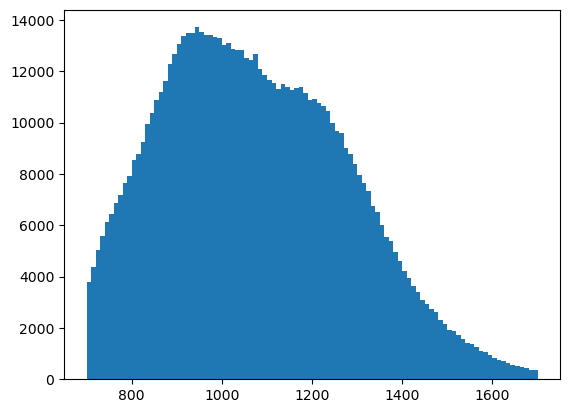

In [6]:
import matplotlib.pyplot as plt

plt.hist(temps.temperature, bins=100)
plt.show()

### Random Forest Routine

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import pandas as pd

In [8]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(temps_params, temps_target['temperature'], test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=250, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

In [22]:
importance = rf_model.feature_importances_
for name, score in zip(X_train.columns, importance):
    print(f"{name}: {score:.4f}")

year: 0.4041
month: 0.1348
day: 0.0673
hour: 0.0555
geodetic_latitude: 0.0848
geodetic_longitude: 0.0754
solar_zenith_angle: 0.0806
kp: 0.0151
dst: 0.0422
f10.7: 0.0000
multiday_f10.7: 0.0000
ap_3_hour: 0.0153
ap_daily: 0.0248


In [23]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [24]:
# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 3902.29
Root Mean Squared Error: 62.47


In [25]:
y_pred.shape, y_test.shape

((146627,), (146627,))

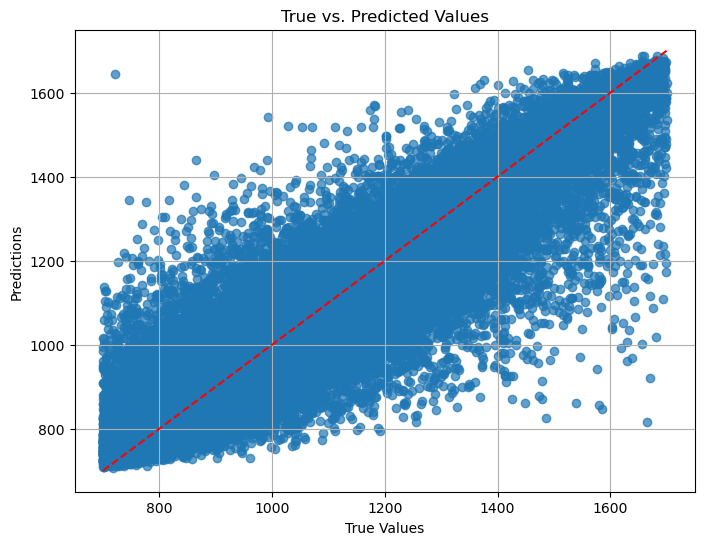

In [26]:
# Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Line of perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.grid()
plt.show()


In [31]:
temps[(temps.site_name == 'caocheira_paulista') & (temps.month == 9)]

,datetime,year,month,day,hour,solar_local_time,hour_local,magnetic_local_time,site_name,min_altitude,...,geodetic_longitude,solar_zenith_angle,kp,dst,f10.7,multiday_f10.7,ap_3_hour,ap_daily,temperature,temperature_error
24,2020-09-01 06:15:48,2020,9,1,6,3.411231,3,3.047661,caocheira_paulista,172.5,...,-43.031523,128.814514,2.7,-26.0,7.000000e-21,7.140000e-21,12.0,18.0,943.425,39.131
25,2020-09-01 06:18:12,2020,9,1,6,3.319381,3,2.934006,caocheira_paulista,172.5,...,-45.009290,129.766602,2.7,-26.0,7.000000e-21,7.140000e-21,12.0,18.0,916.393,34.107
26,2020-09-01 07:09:12,2020,9,1,7,4.169381,4,3.842431,caocheira_paulista,172.5,...,-45.009290,118.446548,2.7,-32.0,7.000000e-21,7.140000e-21,12.0,18.0,1136.065,70.620
27,2020-09-01 07:11:36,2020,9,1,7,4.341231,4,3.968716,caocheira_paulista,172.5,...,-43.031523,115.989471,2.7,-32.0,7.000000e-21,7.140000e-21,12.0,18.0,977.797,51.170
28,2020-09-01 07:14:00,2020,9,1,7,4.249381,4,3.855138,caocheira_paulista,172.5,...,-45.009290,117.162796,2.7,-32.0,7.000000e-21,7.140000e-21,12.0,18.0,947.419,52.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2024-09-30 23:44:36,2024,9,30,23,20.627528,21,20.414883,caocheira_paulista,172.5,...,-46.987057,126.454948,2.3,-5.0,2.140000e-20,2.155000e-20,9.0,9.0,1460.625,8.727
45,2024-09-30 23:50:36,2024,9,30,23,20.859381,21,20.634575,caocheira_paulista,172.5,...,-45.009290,129.382523,2.3,-5.0,2.140000e-20,2.155000e-20,9.0,9.0,1436.055,9.838
46,2024-09-30 23:53:00,2024,9,30,23,20.899381,21,20.708911,caocheira_paulista,172.5,...,-45.009290,130.652725,2.3,-5.0,2.140000e-20,2.155000e-20,9.0,9.0,1448.848,7.880
47,2024-09-30 23:55:24,2024,9,30,23,21.071231,21,20.836549,caocheira_paulista,172.5,...,-43.031523,132.017700,2.3,-5.0,2.140000e-20,2.155000e-20,9.0,9.0,1413.848,9.100


In [35]:
subset_columns = ['f10.7',	'multiday_f10.7', 'ap_3_hour',	'ap_daily']  # Replace with your subset of column names
nan_counts_per_year = temps.groupby('month')[subset_columns].apply(lambda x: x.isna().sum())

print(nan_counts_per_year)


       f10.7  multiday_f10.7  ap_3_hour  ap_daily
month                                            
1        264               0          0         0
2          0               0          0         0
3          0               0          0         0
4          0               0          0         0
5          0               0          0         0
6        980               0          0         0
7          0               0          0         0
8          0               0          0         0
9          0               0          0         0
10         0            2234          0         0
11         0            8963       8963      8963
12      5930            3089       3089      3089
